# Wrangle & Analyze: WeRateDogs Twitter Archive

In [2]:
# Import the libraries needed for this project 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import requests
import zipfile
import tweepy
import json
import time
import os

# Gathering The Data

In [3]:
# Loading the data
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
# Read dataframe
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [5]:
# checking the data types 
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### Tweet image prediction

In [6]:
#URL downloaded programatically 
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
# save to file
with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)

In [7]:
image_predictions = pd.read_csv('image_predictions.tsv', sep = '\t', encoding = 'utf-8')
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [8]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


<h3> Twitter API </h3>

<li> due to verification issues I couldn't get Twitter Data so The following code is the Twitter API code supported by Udacity instructor.

In [9]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
#consumer_key = 'HIDDEN'
#consumer_secret = 'HIDDEN'
#access_token = 'HIDDEN'
#access_secret = 'HIDDEN'

#auth = OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth, wait_on_rate_limit=True)


# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor

# Tweet IDs for which to gather additional data via Twitter's API
#tweet_ids = twitter_archive.tweet_id.values
#len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
#count = 0
#fails_dict = {}
#start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
#with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#    for tweet_id in tweet_ids:
#        count += 1
#        print(str(count) + ": " + str(tweet_id))
#        try:
#            tweet = api.get_status(tweet_id, tweet_mode='extended')
#            print("Success")
#            json.dump(tweet._json, outfile)
#            outfile.write('\n')
#        except tweepy.TweepError as e:
#            print("Fail")
#            fails_dict[tweet_id] = e
#            pass
#end = timer()
#print(end - start)
#print(fails_dict)

In [10]:
# Udacity supported the project by a zip file with the data that we need

# extract the file from the zipfile
with open('tweet-json.zip','rb') as f:
    z_tweets = zipfile.ZipFile(f)
    z_tweets.extractall()
# read the extracted file
z_tweets.namelist()

['tweet-json copy']

In [11]:
# read the file in DataFrame
with open('tweet-json copy', 'r') as f:
    tweet_json = pd.read_json(f, lines= True, encoding = 'utf-8')

In [12]:
# read the data
tweet_json.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [13]:
# Create a new dataframe with id, retweet_count, and favorite_count to work on
tweet_json = open('tweet-json copy', 'r')
df_tweet = pd.DataFrame(columns=['tweet_id', 'retweets', 'favorites'])
for line in tweet_json:
    tweet = json.loads(line)
    df_tweet = df_tweet.append({'tweet_id': tweet['id'], 'retweets': tweet['retweet_count'], 'favorites': tweet['favorite_count']}, ignore_index=True)
tweet_json.close()

In [14]:
# read the data 
df_tweet.head()

,tweet_id,retweets,favorites
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


# Assesing The Data

In [15]:
# now will run each data that we have to start asses them
# first data is twitter_archive
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [16]:
# second data is image_predictions
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [17]:
# the last one is df_tweet
df_tweet

,tweet_id,retweets,favorites
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [18]:
# so now checking the data types 
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [19]:
# check duplicates in the data frame
sum(twitter_archive.duplicated())

0

In [20]:
# selecting random samples
twitter_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1748,679062614270468097,NaN,NaN,2015-12-21 22:15:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chompsky. He lives up to his name. 11/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679062614...,11,10,Chompsky,None,None,None,None
2015,672205392827572224,NaN,NaN,2015-12-03 00:07:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Opal. He's a Royal John Coctostan. Rea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672205392...,9,10,Opal,None,None,pupper,None
500,813112105746448384,NaN,NaN,2016-12-25 20:00:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Toby. He's pupset because his hat isn't b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/813112105...,12,10,Toby,None,None,None,None
405,823939628516474880,NaN,NaN,2017-01-24 17:04:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cash. He's officially given pup on tod...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/823939628...,12,10,Cash,None,None,None,None
2048,671511350426865664,NaN,NaN,2015-12-01 02:09:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Hammond. He's just a wee lil pup....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671511350...,8,10,Hammond,None,None,None,None
1315,706681918348251136,NaN,NaN,2016-03-07 03:24:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Katie. She's a Mitsubishi Hufflep...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/706681918...,12,10,Katie,None,None,None,None
1471,693993230313091072,NaN,NaN,2016-02-01 03:04:14 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",These lil fellas are the best of friends. 12/1...,NaN,NaN,NaN,https://vine.co/v/i5ETazP5hrm,12,10,None,None,None,None,None
657,791774931465953280,NaN,NaN,2016-10-27 22:53:48 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Vine will be deeply missed. This was by far my...,NaN,NaN,NaN,https://vine.co/v/ea0OwvPTx9l,14,10,None,None,None,None,None
1732,679828447187857408,NaN,NaN,2015-12-24 00:58:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Everybody look at this beautiful pupper 13/10 ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679828447...,13,10,None,None,None,pupper,None
1911,674410619106390016,NaN,NaN,2015-12-09 02:09:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lenny. He wants to be a sprinkler. 10/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674410619...,10,10,Lenny,None,None,None,None


In [21]:
# filtering dog stage to see if one dog has multiple stages
twitter_archive.loc[(twitter_archive[['doggo', 'floofer', 'pupper', 'puppo']] != 'None').sum(axis=1) >= 2]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,None,pupper,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,None,doggo,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,None,pupper,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,None,pupper,None
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,None,pupper,None


In [22]:
# seeing names in the data
twitter_archive.name.value_counts().head(50)

None       745
a           55
Charlie     12
Oliver      11
Cooper      11
Lucy        11
Lola        10
Penny       10
Tucker      10
Bo           9
Winston      9
Sadie        8
the          8
Toby         7
Buddy        7
Bailey       7
an           7
Daisy        7
Koda         6
Bella        6
Jax          6
Scout        6
Dave         6
Stanley      6
Milo         6
Jack         6
Rusty        6
Oscar        6
Leo          6
Louis        5
Oakley       5
Chester      5
Sunny        5
Alfie        5
Sammy        5
George       5
Larry        5
Phil         5
very         5
Bentley      5
Finn         5
Gus          5
Luna         4
Jerry        4
Riley        4
Bear         4
Beau         4
Ruby         4
Sampson      4
Boomer       4
Name: name, dtype: int64

In [23]:
# checking the data types 
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [24]:
# check duplicates in the data frame
sum(image_predictions.duplicated())

0

In [25]:
# selecting random samples
image_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
936,703425003149250560,https://pbs.twimg.com/media/CcMRSwUW8AAxxNC.jpg,1,miniature_pinscher,0.292866,True,sleeping_bag,0.142122,False,Italian_greyhound,0.070849,True
1031,711363825979756544,https://pbs.twimg.com/media/Cd9Fn5QUMAAYMT4.jpg,1,Pembroke,0.750906,True,Cardigan,0.241152,True,basenji,0.002640,True
601,679777920601223168,https://pbs.twimg.com/media/CW8OYajUMAAPRoF.jpg,1,bloodhound,0.528819,True,bull_mastiff,0.420119,True,French_bulldog,0.009481,True
98,667766675769573376,https://pbs.twimg.com/media/CURiQMnUAAAPT2M.jpg,1,fire_engine,0.883493,False,tow_truck,0.074734,False,jeep,0.012773,False
2047,886736880519319552,https://pbs.twimg.com/media/DE5Se8FXcAAJFx4.jpg,1,kuvasz,0.309706,True,Great_Pyrenees,0.186136,True,Dandie_Dinmont,0.086346,True
1656,810657578271330305,https://pbs.twimg.com/media/C0AIwgVXAAAc1Ig.jpg,1,malamute,0.753521,True,Siberian_husky,0.166151,True,Eskimo_dog,0.069811,True
1220,743980027717509120,https://pbs.twimg.com/media/ClMl4VLUYAA5qBb.jpg,1,bull_mastiff,0.975730,True,Rhodesian_ridgeback,0.008073,True,pug,0.005571,True
1162,734912297295085568,https://pbs.twimg.com/media/CjLuzPvUoAAbU5k.jpg,1,Maltese_dog,0.847292,True,feather_boa,0.059379,False,Old_English_sheepdog,0.052758,True
1952,863553081350529029,https://pbs.twimg.com/ext_tw_video_thumb/86355...,1,Eskimo_dog,0.413330,True,malamute,0.347646,True,Siberian_husky,0.149536,True
2028,882627270321602560,https://pbs.twimg.com/media/DD-40X3WAAAJPU5.jpg,1,Pembroke,0.542982,True,Chihuahua,0.251988,True,Cardigan,0.107699,True


In [26]:
# checking the data types
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   2354 non-null   object
 1   retweets   2354 non-null   object
 2   favorites  2354 non-null   object
dtypes: object(3)
memory usage: 55.3+ KB


In [27]:
# check duplicates in the data frame
sum(df_tweet.duplicated())

0

In [28]:
# selecting random samples
df_tweet.sample(10)

,tweet_id,retweets,favorites
123,868639477480148993,2240,0
831,768554158521745409,6719,0
1622,684880619965411328,936,2305
233,847617282490613760,468,7558
1464,694342028726001664,557,1727
927,754482103782404096,2220,5852
1736,679527802031484928,823,2892
1520,690649993829576704,325,1435
111,870804317367881728,6393,33791
1033,744995568523612160,716,3277


<h3> notes:</h3>
<ul> Quality
  <li>tweet_id column is int datatype it should be object datatype in <code style="color:red;">twitter_archive</code></li>
  <li>The timestamp column has dates in string form in <code style="color:red;">twitter_archive</code> </li>
  <li>Delete columns that will not be used for analysis in <code style="color:red;">twitter_archive</code> </li>
  <li>Convert 'None' values with 'NaN' for all dog stages in<code style="color:red;">twitter_archive</code></li>
  <li>Rename column name to dog_name <code style="color:red;">twitter_archive</code></li>   
  <li>Wrong names or it could be missing names in name column in <code style="color:red;">twitter_archive</code></li>
  <li>Some dogs have multiple stages in <code style="color:red;">twitter_archive</code></li> 
  
  <li>Convert capital letters in p1, p2, p3 to lowercase in <code style="color:red;">image_predictions</code> </li>
    
  <li>retweets, favorites columns in <code style="color:red;">df_tweet</code> are object datatypes they should be integers</li>
</ul>
<ul> Tidiness
 <li>The values doggo, floofer, pupper, puppo in <code style="color:red;">twitter_archive</code> should be in one category datatype.</li> 
 <li> There are 3 different dataframes better to store it in one dataframe </li>
</ul>

# Cleaning The Data

In [29]:
# before I work on cleaning I have to make copies of the dataframes
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
df_tweet_clean =  df_tweet.copy()

## Quality

#### Define
Convert the datatype to object for tweet_id column in both twitter_archive_clean and image_predictions_clean

#### Code

In [30]:
# change the datatype to object in all datasets
datasets = [twitter_archive_clean,image_predictions_clean]
for i in datasets:
    i.tweet_id = i.tweet_id.astype('object')

#### Test

In [31]:
# check if the code works right
print(twitter_archive_clean.tweet_id.dtypes)
print(image_predictions_clean.tweet_id.dtypes)

object
object


#### Define
Convert the datatype of the timestamp column to datetime

#### Code

In [32]:
# convert timestamp to datetime
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

#### Test

In [33]:
twitter_archive_clean['timestamp']

0      2017-08-01 16:23:56+00:00
1      2017-08-01 00:17:27+00:00
2      2017-07-31 00:18:03+00:00
3      2017-07-30 15:58:51+00:00
4      2017-07-29 16:00:24+00:00
                  ...           
2351   2015-11-16 00:24:50+00:00
2352   2015-11-16 00:04:52+00:00
2353   2015-11-15 23:21:54+00:00
2354   2015-11-15 23:05:30+00:00
2355   2015-11-15 22:32:08+00:00
Name: timestamp, Length: 2356, dtype: datetime64[ns, UTC]

#### Define
Deleting these columns: source, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls

#### Code

In [34]:
# drop columns
twitter_archive_clean = twitter_archive_clean.drop(['source', 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 
                                                    'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls'], 1)
                                                    

#### Test

In [35]:
twitter_archive_clean.columns.values

array(['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper',
       'puppo'], dtype=object)

#### Define
Converting 'None' values to 'NaN' type

#### Code



In [36]:
twitter_archive_clean.loc[twitter_archive_clean['doggo'] == 'None', 'doggo'] = 'NaN'
twitter_archive_clean.loc[twitter_archive_clean['floofer'] == 'None', 'floofer'] = 'NaN'
twitter_archive_clean.loc[twitter_archive_clean['pupper'] == 'None', 'pupper'] = 'NaN'
twitter_archive_clean.loc[twitter_archive_clean['puppo'] == 'None', 'puppo'] = 'NaN'

#### Test

In [37]:
twitter_archive_clean[twitter_archive_clean.columns[6:10]]

,doggo,floofer,pupper,puppo
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
2351,NaN,NaN,NaN,NaN
2352,NaN,NaN,NaN,NaN
2353,NaN,NaN,NaN,NaN
2354,NaN,NaN,NaN,NaN


#### Define
Rename culomn name to dog_name 

#### Code

In [38]:
twitter_archive_clean.rename(columns={'name':'dog_name'},inplace=True)

#### Test

In [39]:
twitter_archive_clean.dog_name

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
2351        None
2352           a
2353           a
2354           a
2355        None
Name: dog_name, Length: 2356, dtype: object

#### Define
Change lowercase names with 'NaN' also, change 'None' to 'NaN'

#### Code

In [40]:
# change lowercase names with 'NaN'
twitter_archive_clean.loc[twitter_archive_clean['dog_name'] == twitter_archive_clean['dog_name'].str.lower(), 'dog_name'] = np.nan
# change 'None' names with 'NaN
twitter_archive_clean.loc[twitter_archive_clean['dog_name'] == 'None', 'dog_name'] = 'NaN'

#### Test


In [41]:
# check if there is a lowercase name
print(twitter_archive_clean.dog_name.str.contains('^[a-z]', regex = True))
# checking names 
twitter_archive_clean.dog_name.value_counts()

0       False
1       False
2       False
3       False
4       False
        ...  
2351    False
2352      NaN
2353      NaN
2354      NaN
2355    False
Name: dog_name, Length: 2356, dtype: object


NaN        745
Charlie     12
Oliver      11
Lucy        11
Cooper      11
          ... 
Cermet       1
Mike         1
Bowie        1
Gustaf       1
Sailor       1
Name: dog_name, Length: 932, dtype: int64

#### Define
Removing dogs that have more than one stages

#### Code

In [42]:
# Remove entries where there are more than one dog stage
twitter_archive_clean = twitter_archive_clean.loc[(twitter_archive_clean[['doggo', 'floofer', 'pupper', 'puppo']] != 'NaN').sum(axis=1) == 1]

#### Test

In [43]:
twitter_archive_clean.loc[(twitter_archive_clean[['doggo', 'floofer', 'pupper', 'puppo']] != 'NaN').sum(axis=1) > 2]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,dog_name,doggo,floofer,pupper,puppo


#### Define
Convert capital letters in p1,p2,p3 to lowercase 

#### Code

In [44]:
# convert each to lowercase
image_predictions_clean['p1'] = image_predictions_clean['p1'].str.lower()
image_predictions_clean['p2'] = image_predictions_clean['p2'].str.lower()
image_predictions_clean['p3'] = image_predictions_clean['p3'].str.lower()

#### Test

In [45]:
# checking if its works right
image_predictions_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True


#### Define
convert retweets, and favorites to int datatype

#### Code

In [46]:
df_tweet_clean['retweets'] = df_tweet_clean['retweets'].astype(int)
df_tweet_clean['favorites'] = df_tweet_clean['favorites'].astype(int)

#### Test

In [47]:
df_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   2354 non-null   object
 1   retweets   2354 non-null   int32 
 2   favorites  2354 non-null   int32 
dtypes: int32(2), object(1)
memory usage: 36.9+ KB


## Tidiness

#### Define
The values doggo, floofer, pupper, puppo should be in one category datatype dog_stage

#### Code

In [48]:
# select the dog stages columns from the dataset
stages = ['doggo', 'floofer', 'pupper', 'puppo']
# change the 'NaN' string with np.nan 
twitter_archive_clean[stages] = twitter_archive_clean[stages].replace('NaN', np.nan)
# create the dog_stage column and combining the four columns in it
twitter_archive_clean['dog_stage'] = twitter_archive_clean[stages].apply(lambda x: ', '.join(x.dropna().astype(str)),axis =1)
# change the empty string with nan also change datatype to category  
twitter_archive_clean.dog_stage = twitter_archive_clean.dog_stage.replace('', np.nan).astype('category')
# drop 'doggo', 'floofer', 'pupper', 'puppo' columns
twitter_archive_clean = twitter_archive_clean.drop(columns = stages, axis =1)

#### Test

In [49]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 9 to 2017
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            366 non-null    object             
 1   timestamp           366 non-null    datetime64[ns, UTC]
 2   text                366 non-null    object             
 3   rating_numerator    366 non-null    int64              
 4   rating_denominator  366 non-null    int64              
 5   dog_name            352 non-null    object             
 6   dog_stage           366 non-null    category           
dtypes: category(1), datetime64[ns, UTC](1), int64(2), object(3)
memory usage: 20.6+ KB


#### Define
There are 3 different dataframes better to store it in one dataframe

#### Code

In [50]:
# meraging the twitter_archive_clean with the df_tweet_clean
cleaned_twitter = pd.merge(left=twitter_archive_clean,
                                 right=df_tweet_clean, left_on='tweet_id', right_on='tweet_id', how='inner')

In [51]:
# meraging the cleaned_twitter with the image_predictions_clean
cleaned_twitter = cleaned_twitter.merge(image_predictions_clean, on='tweet_id', how='inner')

#### Test

In [52]:
cleaned_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307 entries, 0 to 306
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            307 non-null    object             
 1   timestamp           307 non-null    datetime64[ns, UTC]
 2   text                307 non-null    object             
 3   rating_numerator    307 non-null    int64              
 4   rating_denominator  307 non-null    int64              
 5   dog_name            296 non-null    object             
 6   dog_stage           307 non-null    category           
 7   retweets            307 non-null    int32              
 8   favorites           307 non-null    int32              
 9   jpg_url             307 non-null    object             
 10  img_num             307 non-null    int64              
 11  p1                  307 non-null    object             
 12  p1_conf             307 non-null    

In [53]:
cleaned_twitter.to_csv('twitter_archive_master.csv', encoding='utf-8',index=False)

# Analyzing The Data

### Insights one: it shows that all have similar predictions but, p2 is the highest  

In [54]:
pred1 = cleaned_twitter.p1_dog.mean()
pred2 = cleaned_twitter.p2_dog.mean()
pred3 = cleaned_twitter.p3_dog.mean()
print(pred1)
print(pred2)
print(pred3)

0.7328990228013029
0.758957654723127
0.7231270358306189


### Insights two: doggo has the highest retweets

In [55]:
cleaned_twitter.groupby(['dog_stage'])['retweets'].mean()

dog_stage
doggo      7901.552239
floofer    4968.714286
pupper     2468.209524
puppo      6431.434783
Name: retweets, dtype: float64

### Insight three: puppo has the highest favorites

In [56]:
cleaned_twitter.groupby(['dog_stage'])['favorites'].mean()

dog_stage
doggo      18200.776119
floofer    13206.000000
pupper      6957.814286
puppo      20643.739130
Name: favorites, dtype: float64

### Insight four and visualization: Find out the common dog stage of dogs 

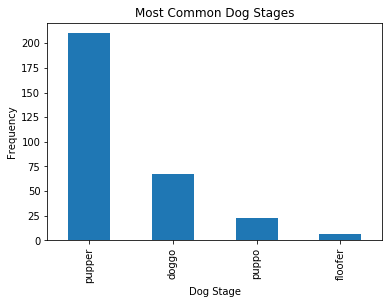

<Figure size 1440x1440 with 0 Axes>

In [60]:
# bar plot
cleaned_twitter.dog_stage.value_counts().plot.bar()
# x-axis label name
plt.xlabel('Dog Stage')
# y-axis label name
plt.ylabel('Frequency')
# title of the graph
plt.title("Most Common Dog Stages")
# figure size of plot
plt.figure(figsize=[20,20])
plt.show()

#### As the bar plot shows pupper is the most common dog stage 